In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error,r2_score
import matplotlib.pyplot as plt
from sklearn.model_selection import ParameterGrid
from prophet import Prophet
import plotly.graph_objects as go

C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
usdInr = pd.read_csv(r'C:/Users/uzmap/Documents/GitHub/ForEx/USDINR/USDINR.csv')
usdInr.drop('Unnamed: 0', axis=1, inplace=True)
usdInr.head()

,Date,Open_price,Day_high,Day_low,Closing_price,Currency Pair,Deseasonalized_Day_high,Deseasonalized_Day_low,Deseasonalized_Open_price,EMA_50,EMA_100,EMA_200,RSI,MACD,Signal_Line,MACD_Histogram,SMA,Upper Band,Lower Band
0,2014-11-07,61.390,61.620,61.340,61.400,USD/INR,61.610101,61.341917,61.393506,61.400000,61.400000,61.400000,0.0,0.000000,0.000000,0.000000,61.7496,62.164424,61.334776
1,2014-11-10,61.500,61.635,61.340,61.495,USD/INR,61.627339,61.332157,61.493596,61.403725,61.401881,61.400945,0.0,0.007578,0.001516,0.006063,61.7496,62.164424,61.334776
2,2014-11-11,61.530,61.555,61.505,61.508,USD/INR,61.547724,61.499491,61.516284,61.407815,61.403983,61.402010,0.0,0.014466,0.004106,0.010361,61.7496,62.164424,61.334776
3,2014-11-12,61.508,61.560,61.350,61.391,USD/INR,61.567341,61.356586,61.504031,61.407155,61.403725,61.401901,0.0,0.010365,0.005358,0.005007,61.7496,62.164424,61.334776
4,2014-11-13,61.368,61.623,61.350,61.565,USD/INR,61.633775,61.348468,61.385332,61.413345,61.406919,61.403524,0.0,0.020914,0.008469,0.012445,61.7496,62.164424,61.334776


Epoch 1/20


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


65/65 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.0519 - mae: 0.1460 - val_loss: 0.0018 - val_mae: 0.0342
Epoch 2/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0039 - mae: 0.0473 - val_loss: 0.0021 - val_mae: 0.0382
Epoch 3/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0030 - mae: 0.0414 - val_loss: 0.0029 - val_mae: 0.0431
Epoch 4/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0030 - mae: 0.0402 - val_loss: 0.0016 - val_mae: 0.0306
Epoch 5/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0022 - mae: 0.0348 - val_loss: 0.0024 - val_mae: 0.0380
Epoch 6/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0020 - mae: 0.0326 - val_loss: 0.0020 - val_mae: 0.0352
Epoch 7/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0018 - mae: 0.0314 - val_loss: 0.0013 - val_mae: 0.0294
Epoch 8/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0018 - mae: 0.0309 - val_loss: 0.0044 - val_mae: 0.0533
Epoch 9/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0015 - mae: 0.0287 - v

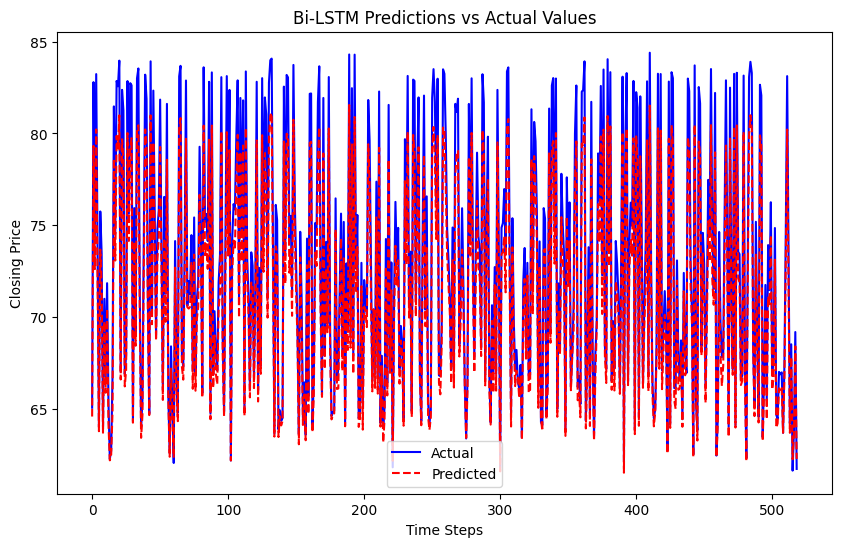

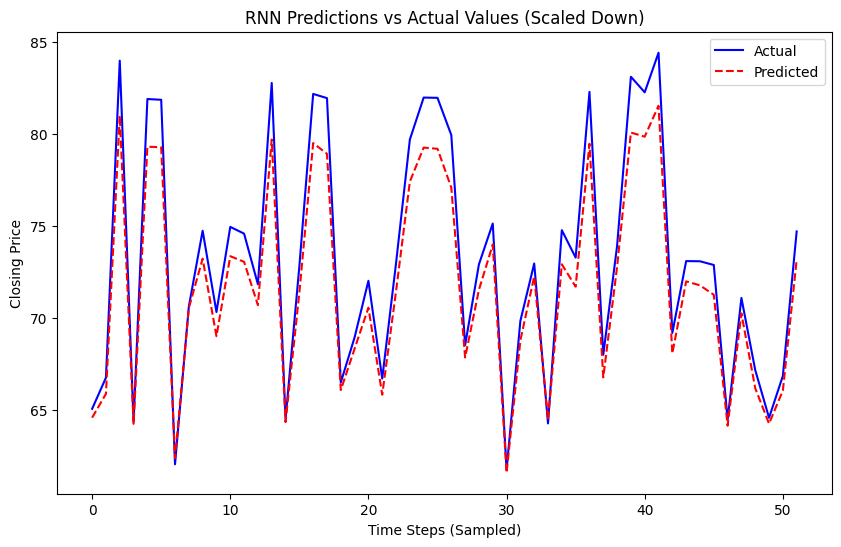

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Bidirectional, Dropout, Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

def bi_lstm_model(usdInr):
    # Define features (X) and target (y)
    target = 'Closing_price'  # Change to your target column
    features = [col for col in usdInr.columns if col not in ['Date', target]]

    # Separate X and y
    X = usdInr[features]
    y = usdInr[target].values
    X = X.select_dtypes('number').values

    # Normalize X and y
    scaler_X = MinMaxScaler()
    scaler_y = MinMaxScaler()

    X = scaler_X.fit_transform(X)
    y = scaler_y.fit_transform(y.reshape(-1, 1)).flatten()

    # Create sequences
    sequence_length = 30  # Length of sequences to be used for the LSTM model

    def create_sequences(X, y, sequence_length):
        X_seq, y_seq = [], []
        for i in range(len(X) - sequence_length):
            X_seq.append(X[i:i + sequence_length])
            y_seq.append(y[i + sequence_length])
        return np.array(X_seq), np.array(y_seq)

    X_seq, y_seq = create_sequences(X, y, sequence_length)

    # Split into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X_seq, y_seq, test_size=0.2, random_state=42)

    # Build Bi-LSTM model with default parameters
    bi_lstm_model = Sequential([
        Bidirectional(LSTM(64, activation='relu', return_sequences=False), input_shape=(sequence_length, X_train.shape[2])),
        Dropout(0.2),  # Regularization
        Dense(32, activation='relu'),
        Dense(1)  # Output layer for regression
    ])

    # Compile the model
    bi_lstm_model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

    # Train the model
    bi_lstm_model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

    # Evaluate the model
    train_loss, train_mae = bi_lstm_model.evaluate(X_train, y_train)
    test_loss, test_mae = bi_lstm_model.evaluate(X_test, y_test)

    print(f"Train Loss: {train_loss:.4f}, Train MAE: {train_mae:.4f}")
    print(f"Test Loss: {test_loss:.4f}, Test MAE: {test_mae:.4f}")

    # Make predictions
    y_pred_bilstm = bi_lstm_model.predict(X_test)
    y_pred_bilstm_rescaled = scaler_y.inverse_transform(y_pred_bilstm.reshape(-1, 1))

    # Rescale actual test data for comparison
    y_test_rescaled = scaler_y.inverse_transform(y_test.reshape(-1, 1))

    mae = mean_absolute_error(y_test_rescaled, y_pred_bilstm_rescaled)
    mse = mean_squared_error(y_test_rescaled, y_pred_bilstm_rescaled)
    mape = mean_absolute_percentage_error(y_test_rescaled, y_pred_bilstm_rescaled)
    r2 = r2_score(y_test_rescaled, y_pred_bilstm_rescaled)

    bi_lstm_metrics = {
        "Metric": ["MAE", "MSE", "MAPE", "R2"],
        "Value": [mae, mse, mape, r2]
    }

    # Plot predictions vs actual values
    plt.figure(figsize=(10, 6))
    plt.plot(y_test_rescaled, label="Actual", color="blue")
    plt.plot(y_pred_bilstm_rescaled, label="Predicted", color="red", linestyle="--")
    plt.legend()
    plt.title("Bi-LSTM Predictions vs Actual Values")
    plt.xlabel("Time Steps")
    plt.ylabel("Closing Price")
    plt.show()

     # Example of selecting a smaller range of data for clarity:
    sampled_indices = range(0, len(y_test_rescaled), 10)  # Down-sample data to every 10th point
    y_test_sampled = [y_test_rescaled[i] for i in sampled_indices]
    y_pred_sampled = [y_pred_bilstm_rescaled[i] for i in sampled_indices]

    plt.figure(figsize=(10, 6))
    plt.plot(y_test_sampled, label="Actual", color="blue")
    plt.plot(y_pred_sampled, label="Predicted", color="red", linestyle="--")
    plt.legend()
    plt.title("RNN Predictions vs Actual Values (Scaled Down)")
    plt.xlabel("Time Steps (Sampled)")
    plt.ylabel("Closing Price")
    plt.show()

    return bi_lstm_metrics


bi_lstm_metrics_df = bi_lstm_model(usdInr)


In [6]:

def grid_search_bilstm(usdInr):
    # Define features (X) and target (y)
    target = 'Closing_price'  # Change to your target column
    features = [col for col in usdInr.columns if col not in ['Date', target]]

    # Separate X and y
    X = usdInr[features]
    y = usdInr[target].values
    X = X.select_dtypes('number').values

    # Normalize X and y
    scaler_X = MinMaxScaler()
    scaler_y = MinMaxScaler()

    X = scaler_X.fit_transform(X)
    y = scaler_y.fit_transform(y.reshape(-1, 1)).flatten()

    # Create sequences
    sequence_length = 30

    def create_sequences(X, y, sequence_length):
        X_seq, y_seq = [], []
        for i in range(len(X) - sequence_length):
            X_seq.append(X[i:i + sequence_length])
            y_seq.append(y[i + sequence_length])
        return np.array(X_seq), np.array(y_seq)

    X_seq, y_seq = create_sequences(X, y, sequence_length)

    # Split into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X_seq, y_seq, test_size=0.2, random_state=42)

    # Define the grid of hyperparameters to search over
    param_grid = {
        'lstm_units': [32, 64, 128],
        'dropout_rate': [0.2, 0.3],
        'batch_size': [16, 32, 64],
        'epochs': [10, 20],
        'lstm_activation': ['relu', 'tanh'],
        'dense_activation': ['relu', 'tanh']
    }

    best_model = None
    best_r2 = -np.inf  # To store the best R2 score
    best_params = None

    # Grid search loop
    for params in ParameterGrid(param_grid):
        print(f"Testing combination: {params}")

        # Build the Bi-LSTM model with the current set of hyperparameters
        bilstm_model = Sequential([
            Bidirectional(LSTM(params['lstm_units'], activation=params['lstm_activation'], return_sequences=False), input_shape=(sequence_length, X_train.shape[2])),
            Dropout(params['dropout_rate']),  # Regularization
            Dense(32, activation=params['dense_activation']),
            Dense(1)  # Output layer for regression
        ])

        # Compile the model
        bilstm_model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

        # Train the model
        bilstm_model.fit(X_train, y_train, epochs=params['epochs'], batch_size=params['batch_size'], validation_data=(X_test, y_test), verbose=0)

        # Evaluate the model
        train_loss, train_mae = bilstm_model.evaluate(X_train, y_train, verbose=0)
        test_loss, test_mae = bilstm_model.evaluate(X_test, y_test, verbose=0)

        # Make predictions
        y_pred_bilstm = bilstm_model.predict(X_test)
        y_pred_bilstm_rescaled = scaler_y.inverse_transform(y_pred_bilstm.reshape(-1, 1))
        y_test_rescaled = scaler_y.inverse_transform(y_test.reshape(-1, 1))

        r2 = r2_score(y_test_rescaled, y_pred_bilstm_rescaled)

        # Check if this combination of hyperparameters produces the best R2 score
        if r2 > best_r2:
            best_r2 = r2
            best_model = bilstm_model
            best_params = params

        print(f"R2: {r2:.4f}")

    print(f"Best R2: {best_r2:.4f}")
    print(f"Best parameters: {best_params}")

    # Return the best model and parameters
    return best_model, best_params

# Run the grid search for Bi-LSTM hyperparameters
best_bilstm_model, best_bilstm_params = grid_search_bilstm(usdInr)


Testing combination: {'batch_size': 16, 'dense_activation': 'relu', 'dropout_rate': 0.2, 'epochs': 10, 'lstm_activation': 'relu', 'lstm_units': 32}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
R2: 0.8862
Testing combination: {'batch_size': 16, 'dense_activation': 'relu', 'dropout_rate': 0.2, 'epochs': 10, 'lstm_activation': 'relu', 'lstm_units': 64}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
R2: 0.9291
Testing combination: {'batch_size': 16, 'dense_activation': 'relu', 'dropout_rate': 0.2, 'epochs': 10, 'lstm_activation': 'relu', 'lstm_units': 128}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
R2: 0.9652
Testing combination: {'batch_size': 16, 'dense_activation': 'relu', 'dropout_rate': 0.2, 'epochs': 10, 'lstm_activation': 'tanh', 'lstm_units': 32}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
R2: 0.9564
Testing combination: {'batch_size': 16, 'dense_activation': 'relu', 'dropout_rate': 0.2, 'epochs': 10, 'lstm_activation': 'tanh', 'lstm_units': 64}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
R2: 0.9917
Testing combination: {'batch_size': 16, 'dense_activation': 'relu', 'dropout_rate': 0.2, 'epochs': 10, 'lstm_activation': 'tanh', 'lstm_units': 128}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step
R2: 0.9965
Testing combination: {'batch_size': 16, 'dense_activation': 'relu', 'dropout_rate': 0.2, 'epochs': 20, 'lstm_activation': 'relu', 'lstm_units': 32}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
R2: 0.9113
Testing combination: {'batch_size': 16, 'dense_activation': 'relu', 'dropout_rate': 0.2, 'epochs': 20, 'lstm_activation': 'relu', 'lstm_units': 64}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
R2: 0.9211
Testing combination: {'batch_size': 16, 'dense_activation': 'relu', 'dropout_rate': 0.2, 'epochs': 20, 'lstm_activation': 'relu', 'lstm_units': 128}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step
R2: 0.9660
Testing combination: {'batch_size': 16, 'dense_activation': 'relu', 'dropout_rate': 0.2, 'epochs': 20, 'lstm_activation': 'tanh', 'lstm_units': 32}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
R2: 0.9604
Testing combination: {'batch_size': 16, 'dense_activation': 'relu', 'dropout_rate': 0.2, 'epochs': 20, 'lstm_activation': 'tanh', 'lstm_units': 64}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step
R2: 0.9961
Testing combination: {'batch_size': 16, 'dense_activation': 'relu', 'dropout_rate': 0.2, 'epochs': 20, 'lstm_activation': 'tanh', 'lstm_units': 128}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step
R2: 0.9877
Testing combination: {'batch_size': 16, 'dense_activation': 'relu', 'dropout_rate': 0.3, 'epochs': 10, 'lstm_activation': 'relu', 'lstm_units': 32}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
R2: 0.7752
Testing combination: {'batch_size': 16, 'dense_activation': 'relu', 'dropout_rate': 0.3, 'epochs': 10, 'lstm_activation': 'relu', 'lstm_units': 64}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
R2: 0.8938
Testing combination: {'batch_size': 16, 'dense_activation': 'relu', 'dropout_rate': 0.3, 'epochs': 10, 'lstm_activation': 'relu', 'lstm_units': 128}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step
R2: 0.9538
Testing combination: {'batch_size': 16, 'dense_activation': 'relu', 'dropout_rate': 0.3, 'epochs': 10, 'lstm_activation': 'tanh', 'lstm_units': 32}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
R2: 0.9632
Testing combination: {'batch_size': 16, 'dense_activation': 'relu', 'dropout_rate': 0.3, 'epochs': 10, 'lstm_activation': 'tanh', 'lstm_units': 64}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step
R2: 0.9962
Testing combination: {'batch_size': 16, 'dense_activation': 'relu', 'dropout_rate': 0.3, 'epochs': 10, 'lstm_activation': 'tanh', 'lstm_units': 128}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step
R2: 0.9969
Testing combination: {'batch_size': 16, 'dense_activation': 'relu', 'dropout_rate': 0.3, 'epochs': 20, 'lstm_activation': 'relu', 'lstm_units': 32}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
R2: 0.8651
Testing combination: {'batch_size': 16, 'dense_activation': 'relu', 'dropout_rate': 0.3, 'epochs': 20, 'lstm_activation': 'relu', 'lstm_units': 64}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step
R2: 0.8587
Testing combination: {'batch_size': 16, 'dense_activation': 'relu', 'dropout_rate': 0.3, 'epochs': 20, 'lstm_activation': 'relu', 'lstm_units': 128}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 73ms/step
R2: 0.9159
Testing combination: {'batch_size': 16, 'dense_activation': 'relu', 'dropout_rate': 0.3, 'epochs': 20, 'lstm_activation': 'tanh', 'lstm_units': 32}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 98ms/step
R2: 0.8923
Testing combination: {'batch_size': 16, 'dense_activation': 'relu', 'dropout_rate': 0.3, 'epochs': 20, 'lstm_activation': 'tanh', 'lstm_units': 64}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 98ms/step
R2: 0.9938
Testing combination: {'batch_size': 16, 'dense_activation': 'relu', 'dropout_rate': 0.3, 'epochs': 20, 'lstm_activation': 'tanh', 'lstm_units': 128}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step
R2: 0.9924
Testing combination: {'batch_size': 16, 'dense_activation': 'tanh', 'dropout_rate': 0.2, 'epochs': 10, 'lstm_activation': 'relu', 'lstm_units': 32}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step
R2: 0.9950
Testing combination: {'batch_size': 16, 'dense_activation': 'tanh', 'dropout_rate': 0.2, 'epochs': 10, 'lstm_activation': 'relu', 'lstm_units': 64}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
R2: 0.9970
Testing combination: {'batch_size': 16, 'dense_activation': 'tanh', 'dropout_rate': 0.2, 'epochs': 10, 'lstm_activation': 'relu', 'lstm_units': 128}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step
R2: 0.9967
Testing combination: {'batch_size': 16, 'dense_activation': 'tanh', 'dropout_rate': 0.2, 'epochs': 10, 'lstm_activation': 'tanh', 'lstm_units': 32}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step
R2: 0.9955
Testing combination: {'batch_size': 16, 'dense_activation': 'tanh', 'dropout_rate': 0.2, 'epochs': 10, 'lstm_activation': 'tanh', 'lstm_units': 64}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 67ms/step
R2: 0.9973
Testing combination: {'batch_size': 16, 'dense_activation': 'tanh', 'dropout_rate': 0.2, 'epochs': 10, 'lstm_activation': 'tanh', 'lstm_units': 128}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 81ms/step
R2: 0.9966
Testing combination: {'batch_size': 16, 'dense_activation': 'tanh', 'dropout_rate': 0.2, 'epochs': 20, 'lstm_activation': 'relu', 'lstm_units': 32}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step
R2: 0.9964
Testing combination: {'batch_size': 16, 'dense_activation': 'tanh', 'dropout_rate': 0.2, 'epochs': 20, 'lstm_activation': 'relu', 'lstm_units': 64}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step
R2: 0.9846
Testing combination: {'batch_size': 16, 'dense_activation': 'tanh', 'dropout_rate': 0.2, 'epochs': 20, 'lstm_activation': 'relu', 'lstm_units': 128}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
R2: 0.9936
Testing combination: {'batch_size': 16, 'dense_activation': 'tanh', 'dropout_rate': 0.2, 'epochs': 20, 'lstm_activation': 'tanh', 'lstm_units': 32}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
R2: 0.9976
Testing combination: {'batch_size': 16, 'dense_activation': 'tanh', 'dropout_rate': 0.2, 'epochs': 20, 'lstm_activation': 'tanh', 'lstm_units': 64}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step
R2: 0.9971
Testing combination: {'batch_size': 16, 'dense_activation': 'tanh', 'dropout_rate': 0.2, 'epochs': 20, 'lstm_activation': 'tanh', 'lstm_units': 128}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step
R2: 0.9975
Testing combination: {'batch_size': 16, 'dense_activation': 'tanh', 'dropout_rate': 0.3, 'epochs': 10, 'lstm_activation': 'relu', 'lstm_units': 32}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
R2: 0.9937
Testing combination: {'batch_size': 16, 'dense_activation': 'tanh', 'dropout_rate': 0.3, 'epochs': 10, 'lstm_activation': 'relu', 'lstm_units': 64}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
R2: 0.9914
Testing combination: {'batch_size': 16, 'dense_activation': 'tanh', 'dropout_rate': 0.3, 'epochs': 10, 'lstm_activation': 'relu', 'lstm_units': 128}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step
R2: 0.9957
Testing combination: {'batch_size': 16, 'dense_activation': 'tanh', 'dropout_rate': 0.3, 'epochs': 10, 'lstm_activation': 'tanh', 'lstm_units': 32}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
R2: 0.9964
Testing combination: {'batch_size': 16, 'dense_activation': 'tanh', 'dropout_rate': 0.3, 'epochs': 10, 'lstm_activation': 'tanh', 'lstm_units': 64}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
R2: 0.9964
Testing combination: {'batch_size': 16, 'dense_activation': 'tanh', 'dropout_rate': 0.3, 'epochs': 10, 'lstm_activation': 'tanh', 'lstm_units': 128}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step
R2: 0.9946
Testing combination: {'batch_size': 16, 'dense_activation': 'tanh', 'dropout_rate': 0.3, 'epochs': 20, 'lstm_activation': 'relu', 'lstm_units': 32}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step
R2: 0.9602
Testing combination: {'batch_size': 16, 'dense_activation': 'tanh', 'dropout_rate': 0.3, 'epochs': 20, 'lstm_activation': 'relu', 'lstm_units': 64}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step
R2: 0.9952
Testing combination: {'batch_size': 16, 'dense_activation': 'tanh', 'dropout_rate': 0.3, 'epochs': 20, 'lstm_activation': 'relu', 'lstm_units': 128}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step
R2: 0.9957
Testing combination: {'batch_size': 16, 'dense_activation': 'tanh', 'dropout_rate': 0.3, 'epochs': 20, 'lstm_activation': 'tanh', 'lstm_units': 32}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step
R2: 0.9946
Testing combination: {'batch_size': 16, 'dense_activation': 'tanh', 'dropout_rate': 0.3, 'epochs': 20, 'lstm_activation': 'tanh', 'lstm_units': 64}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step
R2: 0.9976
Testing combination: {'batch_size': 16, 'dense_activation': 'tanh', 'dropout_rate': 0.3, 'epochs': 20, 'lstm_activation': 'tanh', 'lstm_units': 128}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step
R2: 0.9972
Testing combination: {'batch_size': 32, 'dense_activation': 'relu', 'dropout_rate': 0.2, 'epochs': 10, 'lstm_activation': 'relu', 'lstm_units': 32}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
R2: 0.8928
Testing combination: {'batch_size': 32, 'dense_activation': 'relu', 'dropout_rate': 0.2, 'epochs': 10, 'lstm_activation': 'relu', 'lstm_units': 64}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step
R2: 0.9777
Testing combination: {'batch_size': 32, 'dense_activation': 'relu', 'dropout_rate': 0.2, 'epochs': 10, 'lstm_activation': 'relu', 'lstm_units': 128}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
R2: 0.9935
Testing combination: {'batch_size': 32, 'dense_activation': 'relu', 'dropout_rate': 0.2, 'epochs': 10, 'lstm_activation': 'tanh', 'lstm_units': 32}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
R2: 0.9728
Testing combination: {'batch_size': 32, 'dense_activation': 'relu', 'dropout_rate': 0.2, 'epochs': 10, 'lstm_activation': 'tanh', 'lstm_units': 64}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
R2: 0.9860
Testing combination: {'batch_size': 32, 'dense_activation': 'relu', 'dropout_rate': 0.2, 'epochs': 10, 'lstm_activation': 'tanh', 'lstm_units': 128}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step
R2: 0.9955
Testing combination: {'batch_size': 32, 'dense_activation': 'relu', 'dropout_rate': 0.2, 'epochs': 20, 'lstm_activation': 'relu', 'lstm_units': 32}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
R2: 0.9132
Testing combination: {'batch_size': 32, 'dense_activation': 'relu', 'dropout_rate': 0.2, 'epochs': 20, 'lstm_activation': 'relu', 'lstm_units': 64}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step
R2: 0.9399
Testing combination: {'batch_size': 32, 'dense_activation': 'relu', 'dropout_rate': 0.2, 'epochs': 20, 'lstm_activation': 'relu', 'lstm_units': 128}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step
R2: 0.9379
Testing combination: {'batch_size': 32, 'dense_activation': 'relu', 'dropout_rate': 0.2, 'epochs': 20, 'lstm_activation': 'tanh', 'lstm_units': 32}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
R2: 0.9669
Testing combination: {'batch_size': 32, 'dense_activation': 'relu', 'dropout_rate': 0.2, 'epochs': 20, 'lstm_activation': 'tanh', 'lstm_units': 64}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
R2: 0.9924
Testing combination: {'batch_size': 32, 'dense_activation': 'relu', 'dropout_rate': 0.2, 'epochs': 20, 'lstm_activation': 'tanh', 'lstm_units': 128}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
R2: 0.9971
Testing combination: {'batch_size': 32, 'dense_activation': 'relu', 'dropout_rate': 0.3, 'epochs': 10, 'lstm_activation': 'relu', 'lstm_units': 32}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
R2: 0.7493
Testing combination: {'batch_size': 32, 'dense_activation': 'relu', 'dropout_rate': 0.3, 'epochs': 10, 'lstm_activation': 'relu', 'lstm_units': 64}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step
R2: 0.9148
Testing combination: {'batch_size': 32, 'dense_activation': 'relu', 'dropout_rate': 0.3, 'epochs': 10, 'lstm_activation': 'relu', 'lstm_units': 128}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step
R2: 0.9507
Testing combination: {'batch_size': 32, 'dense_activation': 'relu', 'dropout_rate': 0.3, 'epochs': 10, 'lstm_activation': 'tanh', 'lstm_units': 32}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
R2: 0.9773
Testing combination: {'batch_size': 32, 'dense_activation': 'relu', 'dropout_rate': 0.3, 'epochs': 10, 'lstm_activation': 'tanh', 'lstm_units': 64}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step
R2: 0.9819
Testing combination: {'batch_size': 32, 'dense_activation': 'relu', 'dropout_rate': 0.3, 'epochs': 10, 'lstm_activation': 'tanh', 'lstm_units': 128}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step
R2: 0.9878
Testing combination: {'batch_size': 32, 'dense_activation': 'relu', 'dropout_rate': 0.3, 'epochs': 20, 'lstm_activation': 'relu', 'lstm_units': 32}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
R2: 0.7766
Testing combination: {'batch_size': 32, 'dense_activation': 'relu', 'dropout_rate': 0.3, 'epochs': 20, 'lstm_activation': 'relu', 'lstm_units': 64}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step
R2: 0.8065
Testing combination: {'batch_size': 32, 'dense_activation': 'relu', 'dropout_rate': 0.3, 'epochs': 20, 'lstm_activation': 'relu', 'lstm_units': 128}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
R2: 0.8640
Testing combination: {'batch_size': 32, 'dense_activation': 'relu', 'dropout_rate': 0.3, 'epochs': 20, 'lstm_activation': 'tanh', 'lstm_units': 32}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
R2: 0.9489
Testing combination: {'batch_size': 32, 'dense_activation': 'relu', 'dropout_rate': 0.3, 'epochs': 20, 'lstm_activation': 'tanh', 'lstm_units': 64}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
R2: 0.9969
Testing combination: {'batch_size': 32, 'dense_activation': 'relu', 'dropout_rate': 0.3, 'epochs': 20, 'lstm_activation': 'tanh', 'lstm_units': 128}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
R2: 0.9978
Testing combination: {'batch_size': 32, 'dense_activation': 'tanh', 'dropout_rate': 0.2, 'epochs': 10, 'lstm_activation': 'relu', 'lstm_units': 32}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
R2: 0.9912
Testing combination: {'batch_size': 32, 'dense_activation': 'tanh', 'dropout_rate': 0.2, 'epochs': 10, 'lstm_activation': 'relu', 'lstm_units': 64}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
R2: 0.9935
Testing combination: {'batch_size': 32, 'dense_activation': 'tanh', 'dropout_rate': 0.2, 'epochs': 10, 'lstm_activation': 'relu', 'lstm_units': 128}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step
R2: 0.9965
Testing combination: {'batch_size': 32, 'dense_activation': 'tanh', 'dropout_rate': 0.2, 'epochs': 10, 'lstm_activation': 'tanh', 'lstm_units': 32}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step
R2: 0.9952
Testing combination: {'batch_size': 32, 'dense_activation': 'tanh', 'dropout_rate': 0.2, 'epochs': 10, 'lstm_activation': 'tanh', 'lstm_units': 64}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
R2: 0.9959
Testing combination: {'batch_size': 32, 'dense_activation': 'tanh', 'dropout_rate': 0.2, 'epochs': 10, 'lstm_activation': 'tanh', 'lstm_units': 128}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step
R2: 0.9963
Testing combination: {'batch_size': 32, 'dense_activation': 'tanh', 'dropout_rate': 0.2, 'epochs': 20, 'lstm_activation': 'relu', 'lstm_units': 32}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
R2: 0.9940
Testing combination: {'batch_size': 32, 'dense_activation': 'tanh', 'dropout_rate': 0.2, 'epochs': 20, 'lstm_activation': 'relu', 'lstm_units': 64}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
R2: 0.9964
Testing combination: {'batch_size': 32, 'dense_activation': 'tanh', 'dropout_rate': 0.2, 'epochs': 20, 'lstm_activation': 'relu', 'lstm_units': 128}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
R2: 0.9971
Testing combination: {'batch_size': 32, 'dense_activation': 'tanh', 'dropout_rate': 0.2, 'epochs': 20, 'lstm_activation': 'tanh', 'lstm_units': 32}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step
R2: 0.9966
Testing combination: {'batch_size': 32, 'dense_activation': 'tanh', 'dropout_rate': 0.2, 'epochs': 20, 'lstm_activation': 'tanh', 'lstm_units': 64}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
R2: 0.9975
Testing combination: {'batch_size': 32, 'dense_activation': 'tanh', 'dropout_rate': 0.2, 'epochs': 20, 'lstm_activation': 'tanh', 'lstm_units': 128}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
R2: 0.9967
Testing combination: {'batch_size': 32, 'dense_activation': 'tanh', 'dropout_rate': 0.3, 'epochs': 10, 'lstm_activation': 'relu', 'lstm_units': 32}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
R2: 0.9918
Testing combination: {'batch_size': 32, 'dense_activation': 'tanh', 'dropout_rate': 0.3, 'epochs': 10, 'lstm_activation': 'relu', 'lstm_units': 64}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
R2: 0.9960
Testing combination: {'batch_size': 32, 'dense_activation': 'tanh', 'dropout_rate': 0.3, 'epochs': 10, 'lstm_activation': 'relu', 'lstm_units': 128}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step
R2: 0.9968
Testing combination: {'batch_size': 32, 'dense_activation': 'tanh', 'dropout_rate': 0.3, 'epochs': 10, 'lstm_activation': 'tanh', 'lstm_units': 32}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
R2: 0.9951
Testing combination: {'batch_size': 32, 'dense_activation': 'tanh', 'dropout_rate': 0.3, 'epochs': 10, 'lstm_activation': 'tanh', 'lstm_units': 64}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step
R2: 0.9907
Testing combination: {'batch_size': 32, 'dense_activation': 'tanh', 'dropout_rate': 0.3, 'epochs': 10, 'lstm_activation': 'tanh', 'lstm_units': 128}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step
R2: 0.9955
Testing combination: {'batch_size': 32, 'dense_activation': 'tanh', 'dropout_rate': 0.3, 'epochs': 20, 'lstm_activation': 'relu', 'lstm_units': 32}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step
R2: 0.9650
Testing combination: {'batch_size': 32, 'dense_activation': 'tanh', 'dropout_rate': 0.3, 'epochs': 20, 'lstm_activation': 'relu', 'lstm_units': 64}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step
R2: 0.9934
Testing combination: {'batch_size': 32, 'dense_activation': 'tanh', 'dropout_rate': 0.3, 'epochs': 20, 'lstm_activation': 'relu', 'lstm_units': 128}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step
R2: 0.9967
Testing combination: {'batch_size': 32, 'dense_activation': 'tanh', 'dropout_rate': 0.3, 'epochs': 20, 'lstm_activation': 'tanh', 'lstm_units': 32}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step
R2: 0.9972
Testing combination: {'batch_size': 32, 'dense_activation': 'tanh', 'dropout_rate': 0.3, 'epochs': 20, 'lstm_activation': 'tanh', 'lstm_units': 64}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
R2: 0.9971
Testing combination: {'batch_size': 32, 'dense_activation': 'tanh', 'dropout_rate': 0.3, 'epochs': 20, 'lstm_activation': 'tanh', 'lstm_units': 128}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
R2: 0.9968
Testing combination: {'batch_size': 64, 'dense_activation': 'relu', 'dropout_rate': 0.2, 'epochs': 10, 'lstm_activation': 'relu', 'lstm_units': 32}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
R2: 0.9430
Testing combination: {'batch_size': 64, 'dense_activation': 'relu', 'dropout_rate': 0.2, 'epochs': 10, 'lstm_activation': 'relu', 'lstm_units': 64}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
R2: 0.9542
Testing combination: {'batch_size': 64, 'dense_activation': 'relu', 'dropout_rate': 0.2, 'epochs': 10, 'lstm_activation': 'relu', 'lstm_units': 128}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
R2: 0.9822
Testing combination: {'batch_size': 64, 'dense_activation': 'relu', 'dropout_rate': 0.2, 'epochs': 10, 'lstm_activation': 'tanh', 'lstm_units': 32}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
R2: 0.9809
Testing combination: {'batch_size': 64, 'dense_activation': 'relu', 'dropout_rate': 0.2, 'epochs': 10, 'lstm_activation': 'tanh', 'lstm_units': 64}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
R2: 0.9952
Testing combination: {'batch_size': 64, 'dense_activation': 'relu', 'dropout_rate': 0.2, 'epochs': 10, 'lstm_activation': 'tanh', 'lstm_units': 128}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
R2: 0.9969
Testing combination: {'batch_size': 64, 'dense_activation': 'relu', 'dropout_rate': 0.2, 'epochs': 20, 'lstm_activation': 'relu', 'lstm_units': 32}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
R2: 0.8805
Testing combination: {'batch_size': 64, 'dense_activation': 'relu', 'dropout_rate': 0.2, 'epochs': 20, 'lstm_activation': 'relu', 'lstm_units': 64}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
R2: 0.9317
Testing combination: {'batch_size': 64, 'dense_activation': 'relu', 'dropout_rate': 0.2, 'epochs': 20, 'lstm_activation': 'relu', 'lstm_units': 128}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
R2: 0.9696
Testing combination: {'batch_size': 64, 'dense_activation': 'relu', 'dropout_rate': 0.2, 'epochs': 20, 'lstm_activation': 'tanh', 'lstm_units': 32}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
R2: 0.9418
Testing combination: {'batch_size': 64, 'dense_activation': 'relu', 'dropout_rate': 0.2, 'epochs': 20, 'lstm_activation': 'tanh', 'lstm_units': 64}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
R2: 0.9913
Testing combination: {'batch_size': 64, 'dense_activation': 'relu', 'dropout_rate': 0.2, 'epochs': 20, 'lstm_activation': 'tanh', 'lstm_units': 128}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
R2: 0.9943
Testing combination: {'batch_size': 64, 'dense_activation': 'relu', 'dropout_rate': 0.3, 'epochs': 10, 'lstm_activation': 'relu', 'lstm_units': 32}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
R2: 0.7752
Testing combination: {'batch_size': 64, 'dense_activation': 'relu', 'dropout_rate': 0.3, 'epochs': 10, 'lstm_activation': 'relu', 'lstm_units': 64}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
R2: 0.9373
Testing combination: {'batch_size': 64, 'dense_activation': 'relu', 'dropout_rate': 0.3, 'epochs': 10, 'lstm_activation': 'relu', 'lstm_units': 128}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
R2: 0.9848
Testing combination: {'batch_size': 64, 'dense_activation': 'relu', 'dropout_rate': 0.3, 'epochs': 10, 'lstm_activation': 'tanh', 'lstm_units': 32}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
R2: 0.9540
Testing combination: {'batch_size': 64, 'dense_activation': 'relu', 'dropout_rate': 0.3, 'epochs': 10, 'lstm_activation': 'tanh', 'lstm_units': 64}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
R2: 0.9904
Testing combination: {'batch_size': 64, 'dense_activation': 'relu', 'dropout_rate': 0.3, 'epochs': 10, 'lstm_activation': 'tanh', 'lstm_units': 128}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
R2: 0.9965
Testing combination: {'batch_size': 64, 'dense_activation': 'relu', 'dropout_rate': 0.3, 'epochs': 20, 'lstm_activation': 'relu', 'lstm_units': 32}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
R2: 0.7614
Testing combination: {'batch_size': 64, 'dense_activation': 'relu', 'dropout_rate': 0.3, 'epochs': 20, 'lstm_activation': 'relu', 'lstm_units': 64}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
R2: 0.9083
Testing combination: {'batch_size': 64, 'dense_activation': 'relu', 'dropout_rate': 0.3, 'epochs': 20, 'lstm_activation': 'relu', 'lstm_units': 128}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
R2: 0.8986
Testing combination: {'batch_size': 64, 'dense_activation': 'relu', 'dropout_rate': 0.3, 'epochs': 20, 'lstm_activation': 'tanh', 'lstm_units': 32}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
R2: 0.9646
Testing combination: {'batch_size': 64, 'dense_activation': 'relu', 'dropout_rate': 0.3, 'epochs': 20, 'lstm_activation': 'tanh', 'lstm_units': 64}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
R2: 0.9959
Testing combination: {'batch_size': 64, 'dense_activation': 'relu', 'dropout_rate': 0.3, 'epochs': 20, 'lstm_activation': 'tanh', 'lstm_units': 128}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
R2: 0.9954
Testing combination: {'batch_size': 64, 'dense_activation': 'tanh', 'dropout_rate': 0.2, 'epochs': 10, 'lstm_activation': 'relu', 'lstm_units': 32}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
R2: 0.9941
Testing combination: {'batch_size': 64, 'dense_activation': 'tanh', 'dropout_rate': 0.2, 'epochs': 10, 'lstm_activation': 'relu', 'lstm_units': 64}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
R2: 0.9917
Testing combination: {'batch_size': 64, 'dense_activation': 'tanh', 'dropout_rate': 0.2, 'epochs': 10, 'lstm_activation': 'relu', 'lstm_units': 128}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
R2: 0.9934
Testing combination: {'batch_size': 64, 'dense_activation': 'tanh', 'dropout_rate': 0.2, 'epochs': 10, 'lstm_activation': 'tanh', 'lstm_units': 32}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
R2: 0.9944
Testing combination: {'batch_size': 64, 'dense_activation': 'tanh', 'dropout_rate': 0.2, 'epochs': 10, 'lstm_activation': 'tanh', 'lstm_units': 64}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
R2: 0.9937
Testing combination: {'batch_size': 64, 'dense_activation': 'tanh', 'dropout_rate': 0.2, 'epochs': 10, 'lstm_activation': 'tanh', 'lstm_units': 128}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
R2: 0.9970
Testing combination: {'batch_size': 64, 'dense_activation': 'tanh', 'dropout_rate': 0.2, 'epochs': 20, 'lstm_activation': 'relu', 'lstm_units': 32}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
R2: 0.9820
Testing combination: {'batch_size': 64, 'dense_activation': 'tanh', 'dropout_rate': 0.2, 'epochs': 20, 'lstm_activation': 'relu', 'lstm_units': 64}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
R2: 0.9964
Testing combination: {'batch_size': 64, 'dense_activation': 'tanh', 'dropout_rate': 0.2, 'epochs': 20, 'lstm_activation': 'relu', 'lstm_units': 128}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
R2: 0.9970
Testing combination: {'batch_size': 64, 'dense_activation': 'tanh', 'dropout_rate': 0.2, 'epochs': 20, 'lstm_activation': 'tanh', 'lstm_units': 32}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
R2: 0.9913
Testing combination: {'batch_size': 64, 'dense_activation': 'tanh', 'dropout_rate': 0.2, 'epochs': 20, 'lstm_activation': 'tanh', 'lstm_units': 64}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
R2: 0.9956
Testing combination: {'batch_size': 64, 'dense_activation': 'tanh', 'dropout_rate': 0.2, 'epochs': 20, 'lstm_activation': 'tanh', 'lstm_units': 128}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
R2: 0.9976
Testing combination: {'batch_size': 64, 'dense_activation': 'tanh', 'dropout_rate': 0.3, 'epochs': 10, 'lstm_activation': 'relu', 'lstm_units': 32}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
R2: 0.9930
Testing combination: {'batch_size': 64, 'dense_activation': 'tanh', 'dropout_rate': 0.3, 'epochs': 10, 'lstm_activation': 'relu', 'lstm_units': 64}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
R2: 0.9884
Testing combination: {'batch_size': 64, 'dense_activation': 'tanh', 'dropout_rate': 0.3, 'epochs': 10, 'lstm_activation': 'relu', 'lstm_units': 128}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
R2: 0.9956
Testing combination: {'batch_size': 64, 'dense_activation': 'tanh', 'dropout_rate': 0.3, 'epochs': 10, 'lstm_activation': 'tanh', 'lstm_units': 32}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
R2: 0.9913
Testing combination: {'batch_size': 64, 'dense_activation': 'tanh', 'dropout_rate': 0.3, 'epochs': 10, 'lstm_activation': 'tanh', 'lstm_units': 64}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
R2: 0.9962
Testing combination: {'batch_size': 64, 'dense_activation': 'tanh', 'dropout_rate': 0.3, 'epochs': 10, 'lstm_activation': 'tanh', 'lstm_units': 128}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
R2: 0.9968
Testing combination: {'batch_size': 64, 'dense_activation': 'tanh', 'dropout_rate': 0.3, 'epochs': 20, 'lstm_activation': 'relu', 'lstm_units': 32}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
R2: 0.9953
Testing combination: {'batch_size': 64, 'dense_activation': 'tanh', 'dropout_rate': 0.3, 'epochs': 20, 'lstm_activation': 'relu', 'lstm_units': 64}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
R2: 0.9956
Testing combination: {'batch_size': 64, 'dense_activation': 'tanh', 'dropout_rate': 0.3, 'epochs': 20, 'lstm_activation': 'relu', 'lstm_units': 128}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
R2: 0.9964
Testing combination: {'batch_size': 64, 'dense_activation': 'tanh', 'dropout_rate': 0.3, 'epochs': 20, 'lstm_activation': 'tanh', 'lstm_units': 32}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
R2: 0.9948
Testing combination: {'batch_size': 64, 'dense_activation': 'tanh', 'dropout_rate': 0.3, 'epochs': 20, 'lstm_activation': 'tanh', 'lstm_units': 64}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
R2: 0.9939
Testing combination: {'batch_size': 64, 'dense_activation': 'tanh', 'dropout_rate': 0.3, 'epochs': 20, 'lstm_activation': 'tanh', 'lstm_units': 128}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
R2: 0.9967
Best R2: 0.9978
Best parameters: {'batch_size': 32, 'dense_activation': 'relu', 'dropout_rate': 0.3, 'epochs': 20, 'lstm_activation': 'tanh', 'lstm_units': 128}


Epoch 1/20


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


65/65 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.1279 - mae: 0.1991 - val_loss: 0.0014 - val_mae: 0.0295
Epoch 2/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0042 - mae: 0.0495 - val_loss: 0.0014 - val_mae: 0.0304
Epoch 3/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0034 - mae: 0.0443 - val_loss: 9.3536e-04 - val_mae: 0.0241
Epoch 4/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0025 - mae: 0.0379 - val_loss: 5.5995e-04 - val_mae: 0.0181
Epoch 5/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0018 - mae: 0.0330 - val_loss: 9.9244e-04 - val_mae: 0.0259
Epoch 6/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0018 - mae: 0.0330 - val_loss: 0.0018 - val_mae: 0.0356
Epoch 7/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0016 - mae: 0.0304 - val_loss: 3.2097e-04 - val_mae: 0.0133
Epoch 8/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0012 - mae: 0.0267 - val_loss: 3.1308e-04 - val_mae: 0.0134
Epoch 9/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - lo

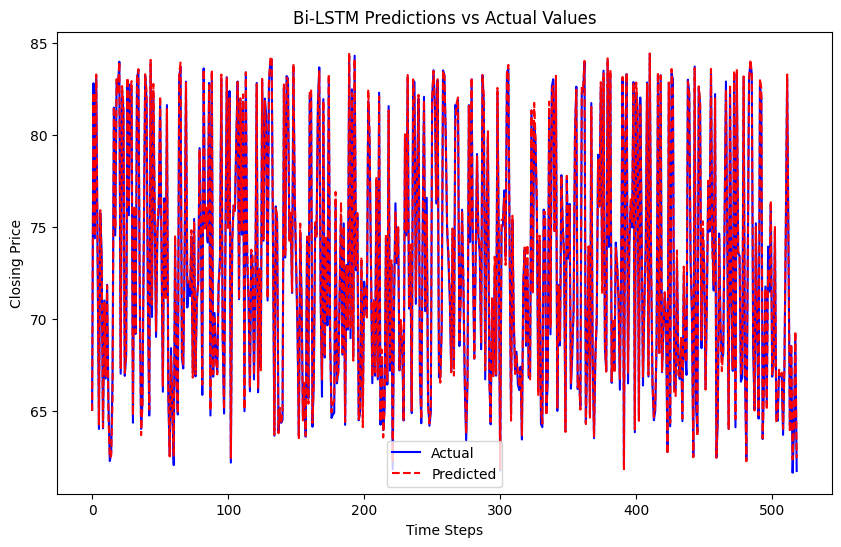

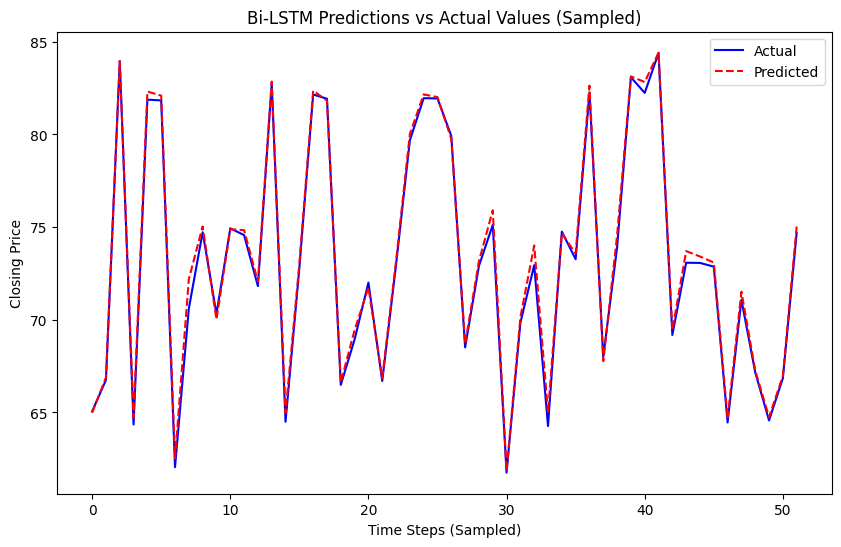

In [7]:
def bilstm_model_with_best_params(usdInr, best_params):
    # Define features (X) and target (y)
    target = 'Closing_price'  # Change to your target column
    features = [col for col in usdInr.columns if col not in ['Date', target]]

    # Separate X and y
    X = usdInr[features]
    y = usdInr[target].values
    X = X.select_dtypes('number').values

    # Normalize X and y
    scaler_X = MinMaxScaler()
    scaler_y = MinMaxScaler()

    X = scaler_X.fit_transform(X)
    y = scaler_y.fit_transform(y.reshape(-1, 1)).flatten()

    # Create sequences
    sequence_length = 30

    def create_sequences(X, y, sequence_length):
        X_seq, y_seq = [], []
        for i in range(len(X) - sequence_length):
            X_seq.append(X[i:i + sequence_length])
            y_seq.append(y[i + sequence_length])
        return np.array(X_seq), np.array(y_seq)

    X_seq, y_seq = create_sequences(X, y, sequence_length)

    # Split into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X_seq, y_seq, test_size=0.2, random_state=42)

    # Build the Bidirectional LSTM model using the best parameters
    bilstm_model = Sequential([
        Bidirectional(LSTM(best_params['lstm_units'], activation=best_params['lstm_activation'], return_sequences=False), input_shape=(sequence_length, X_train.shape[2])),
        Dropout(best_params['dropout_rate']),  # Regularization
        Dense(32, activation=best_params['dense_activation']),
        Dense(1)  # Output layer for regression
    ])

    # Compile the model
    bilstm_model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

    # Train the model
    bilstm_model.fit(X_train, y_train, epochs=best_params['epochs'], batch_size=best_params['batch_size'], validation_data=(X_test, y_test))

    # Evaluate the model
    train_loss, train_mae = bilstm_model.evaluate(X_train, y_train)
    test_loss, test_mae = bilstm_model.evaluate(X_test, y_test)

    print(f"Train Loss: {train_loss:.4f}, Train MAE: {train_mae:.4f}")
    print(f"Test Loss: {test_loss:.4f}, Test MAE: {test_mae:.4f}")

    # Make predictions
    y_pred_bilstm = bilstm_model.predict(X_test)
    y_pred_bilstm_rescaled = scaler_y.inverse_transform(y_pred_bilstm.reshape(-1, 1))

    # Rescale actual test data for comparison
    y_test_rescaled = scaler_y.inverse_transform(y_test.reshape(-1, 1))

    # Calculate metrics
    mae = mean_absolute_error(y_test_rescaled, y_pred_bilstm_rescaled)
    mse = mean_squared_error(y_test_rescaled, y_pred_bilstm_rescaled)
    mape = mean_absolute_percentage_error(y_test_rescaled, y_pred_bilstm_rescaled)
    r2 = r2_score(y_test_rescaled, y_pred_bilstm_rescaled)

    bilstm_metrics = pd.DataFrame({
        "Metric": ["MAE", "MSE", "MAPE", "R2"],
        "Value": [mae, mse, mape, r2]
    })

    # Plot predictions vs actual values
    plt.figure(figsize=(10, 6))
    plt.plot(y_test_rescaled, label="Actual", color="blue")
    plt.plot(y_pred_bilstm_rescaled, label="Predicted", color="red", linestyle="--")
    plt.legend()
    plt.title("Bi-LSTM Predictions vs Actual Values")
    plt.xlabel("Time Steps")
    plt.ylabel("Closing Price")
    plt.show()

    # Example of selecting a smaller range of data for clarity:
    sampled_indices = range(0, len(y_test_rescaled), 10)  # Down-sample data to every 10th point
    y_test_sampled = [y_test_rescaled[i] for i in sampled_indices]
    y_pred_sampled = [y_pred_bilstm_rescaled[i] for i in sampled_indices]

    plt.figure(figsize=(10, 6))
    plt.plot(y_test_sampled, label="Actual", color="blue")
    plt.plot(y_pred_sampled, label="Predicted", color="red", linestyle="--")
    plt.legend()
    plt.title("Bi-LSTM Predictions vs Actual Values (Sampled)")
    plt.xlabel("Time Steps (Sampled)")
    plt.ylabel("Closing Price")
    plt.show()

    return bilstm_metrics

# Run the Bi-LSTM model with the best parameters found from the grid search or other hyperparameter optimization methods
# best_params = {'lstm_units': 64, 'lstm_activation': 'relu', 'dropout_rate': 0.2, 'epochs': 20, 'batch_size': 32, 'dense_activation': 'relu'}
bilstm_metrics_withBestParams_df = bilstm_model_with_best_params(usdInr, best_bilstm_params)

In [8]:
bi_lstm_metrics_df

{'Metric': ['MAE', 'MSE', 'MAPE', 'R2'],
 'Value': [1.5095791035382045,
  3.3110537935789814,
  0.019693577026627055,
  0.9271198784953012]}

In [9]:
bilstm_metrics_withBestParams_df

,Metric,Value
0,MAE,0.267418
1,MSE,0.125087
2,MAPE,0.003722
3,R2,0.997247
